In [1]:
from pathlib import Path
from typing import Tuple , Union ,List

import cv2
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import tensorflow as tf

# Functions

In [2]:
def convert_to_gray(img: np.ndarray) -> np.ndarray:
    img = img.copy()
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def resize_img(img: np.ndarray, size: Tuple[int, int] = (224, 224)) -> np.ndarray:
    return cv2.resize(img, size)

def get_all_img_files(dir_path : str)-> List[np.ndarray]:
    return [x for x in Path(dir_path).glob("*") if x.is_file()]

def read_imgs_from_files(files:Union[List[Path],str])-> List[np.ndarray]:
    return [cv2.imread(str(file)) for file in files]

In [3]:
dir_path = r"C:/Users/MA51801/Documents/Projects/Sudoku_Project/blockbuster_book_of_sudoku_images"
img_files = get_all_img_files(dir_path)
imgs = read_imgs_from_files(img_files)
gray_imgs = [convert_to_gray(img) for img in imgs]
# resize_img = [resize_img(img) for img in gray_imgs]


len(img_files)


47

numpy.ndarray

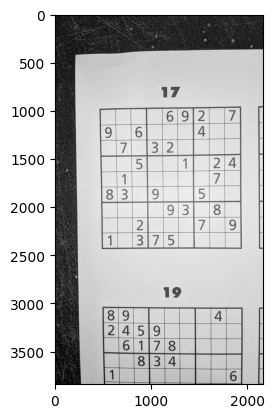

In [4]:
plt.imshow(gray_imgs[15],cmap='gray')
type(gray_imgs[9])

In [9]:
board_resize_dim = 2520
im_index = 13
img_detect, img_show = gray_imgs[im_index].copy(), gray_imgs[im_index].copy()

def gaussian_blur(img:np.ndarray, kernel_size:tuple = (5,5))->np.ndarray:
    """
    Applies Gaussian blur filter to an image
    
    Parameters:
        img (np.ndarray): The input image
        kernel_size (tuple): The size of the kernel. It must be odd and the width and height must be positive and greater than 0.
    Returns:
        np.ndarray: The image after applying the Gaussian blur filter
    """
    return cv2.GaussianBlur(img, kernel_size, 0)

# # Find the edges in the image using Canny edge detection

def canny_edge(img:np.ndarray, thresh_1:int = 50, thresh_2:int =200) -> np.ndarray:
    """
    Applies Canny edge detection to an image
    
    Parameters:
        img (np.ndarray): The input image.
        thresh_1 (int): The first threshold for the hysteresis procedure.
        thresh_2 (int): The second threshold for the hysteresis procedure.
    Returns:
        np.ndarray: The image after applying the Canny edge detection.
    """
    return cv2.Canny(img, thresh_1, thresh_2)
# # Find the contours in the edged image

def find_countours(img:np.ndarray,mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)->tuple:
    """
    Finds contours in a binary image
    
    Parameters:
        img (np.ndarray): The input binary image.
        mode (int): Contour retrieval mode. It has 3 options:  cv2.RETR_EXTERNAL,  cv2.RETR_LIST and  cv2.RETR_CCOMP and cv2.RETR_TREE 
        method (int): Contour approximation method. It has 4 options: cv2.CHAIN_APPROX_NONE, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_TC89_L1, cv2.CHAIN_APPROX_TC89_KCOS
    Returns:
        tuple: A tuple of (contours, hierarchy) where contours is a list of contours, each represented as a list of points and hierarchy is the output vector, containing information about the image topology.
    """
    return cv2.findContours(img, mode, method)



def get_sorted_contours(contours: List[np.ndarray],n_counters:int)->  List[np.ndarray]:
    """
    Sorts contours based on their area and returns the top 'n_counters' contours
    
    Parameters:
    contours (List[Union[List[List[int]], np.ndarray]]): A list of contours, each represented as a list of points or numpy ndarray
    n_counters (int): Number of contours that are needed to be returned
    
    Returns:
    List[Union[List[List[int]], np.ndarray]]: A list of the 'n_counters' contours with the largest areas
    """
    return sorted(contours, key=cv2.contourArea, reverse=True)[:n_counters]

# # Initialize a bounding box for the Sudoku board

def find_board(contours: List[np.ndarray]) -> np.ndarray:
    """
    Finds the board in the given contours and returns the board image
    
    Parameters:
        contours (List[np.ndarray]): A list of contours
    Returns:
        np.ndarray: The board image
    """
    board_box = None
    # Loop over the contours
    for contour in contours:
        # Approximate the contour with a polygon
        polygon = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
         # Check if the polygon has four sides (a square)
        if len(polygon) == 4:
            # Save the bounding box of the square
            board_box = cv2.boundingRect(polygon)
            break
    # Extract the Sudoku board from the image
    return img_show[board_box[1]:board_box[1] + board_box[3], board_box[0]:board_box[0] + board_box[2]]


def resize_img(img: np.ndarray, board_resize_dim:int = 2520) -> np.ndarray:
    """
    Resizes an image to the desired dimensions
    
    Parameters:
        img (np.ndarray): The input image
        board_resize_dim (int): The desired dimension of the image
    Returns:
        np.ndarray: The resized image
    """
    size = (board_resize_dim, board_resize_dim)
    return cv2.resize(img, size)

# board_image = cv2.resize(board_image,(board_resize_dim,board_resize_dim))



# Create Image Classifier Training Data

<class 'tuple'>


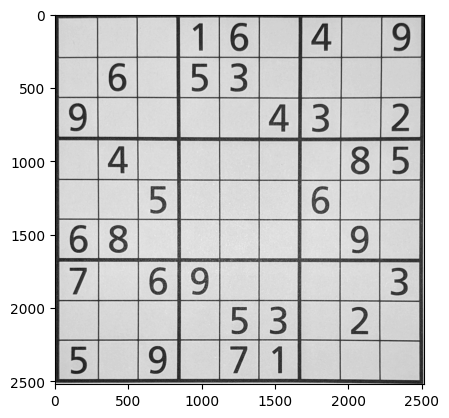

In [669]:
board_resize_dim = 2520
im_index = 0
img_detect, img_show = gray_imgs[im_index].copy(), gray_imgs[im_index].copy()




blurred_image = cv2.GaussianBlur(img_detect, (5, 5), 0)

# # Find the edges in the image using Canny edge detection
edged_image = cv2.Canny(img_detect, 50, 200)
# # Find the contours in the edged image
contours, _ = cv2.findContours(edged_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # Sort the contours by area and keep only the largest ones
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# # Initialize a bounding box for the Sudoku board
board_box = None
# # print(img_file_dict.get(im_index))
# # Loop over the contours
for contour in contours:
    # Approximate the contour with a polygon
    polygon = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
     # Check if the polygon has four sides (a square)
    if len(polygon) == 4:
        # Save the bounding box of the square
        board_box = cv2.boundingRect(polygon)
        break
print(type(board_box))
# Extract the Sudoku board from the image
board_image = img_show[board_box[1]:board_box[1] + board_box[3], board_box[0]:board_box[0] + board_box[2]]
board_image = cv2.resize(board_image,(board_resize_dim,board_resize_dim))
plt.imshow(board_image , cmap = 'gray')
  


# Parse Board and Save Numbers for Classification Training

In [670]:
board_steps = np.arange(0,board_resize_dim, board_resize_dim/9.0 , dtype = int)
square_dim = int(board_resize_dim/9)
board_steps = np.arange(0,board_resize_dim, square_dim)
check_im_list = []
for vert_index in range(len(board_steps)):
    for horiz_index in range(len(board_steps)):
        check_im = board_image[board_steps[vert_index]:board_steps[vert_index] + square_dim,board_steps[horiz_index]:board_steps[horiz_index]+square_dim]
        check_im_list.append(check_im)
        


    

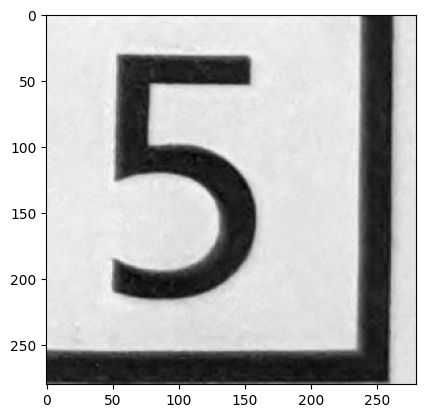

In [491]:
im_index =80
plt.imshow(check_im_list[im_index], cmap ='gray')

In [416]:

training_data_file_path_map = {1:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/1/",
                         2:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/2/",
                         3:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/3/",
                         4:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/4/",
                         5:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/5/",
                         6:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/6/",
                         7:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/7/",
                         8:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/8/",
                         9:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/9/",
                         0:"C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/0/",
                        }

path_index = 1
img = check_im_list[im_index].copy()
file_path = training_data_file_path_map[path_index] +  training_data_file_path_map[path_index][-2] + '_' + datetime.now().strftime("%y%m%d%H%H%S")+".jpg"
print(file_path)
plt.imsave(file_path,img ,cmap='gray')

C:/Users/MA51801/Documents/Projects/Sudoku_Project/image_classification_training_data/1/1_230707131340.jpg


In [8]:
# # Set up the figure and grid
# fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# # Adjust the spacing between the subplots and the edges of the figure
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)

# # Iterate through the images and plot the histograms
# for ax, image in zip(axes.flatten(),check_im_list[0:9] ):
#     ax.hist(image.flatten(), bins=256, range=(0, 256))
#     ax.set_title(f"{np.median(image)}" + " "  + f"{np.sum(image)}")

In [514]:
model_classify = tf.keras.models.load_model(r"C:\Users\MA51801\Documents\Projects\Sudoku_Project\digit_classifier_model\digit_classifier_vgg16.hdf5")


In [512]:
# model = tf.keras.models.load_model(r"C:\Users\MA51801\Documents\Projects\Sudoku_Project\digit_classifier_model\digit_classifier_cnn_data_augmentation_weighted.hdf5")

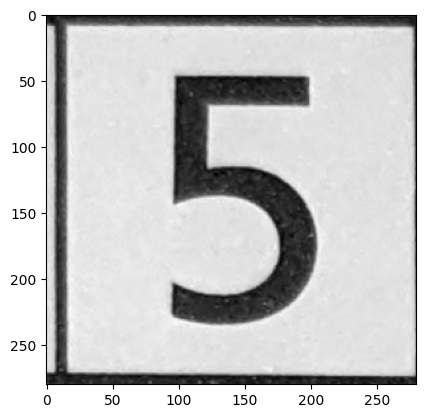

In [479]:
im_index = 19
img = check_im_list[im_index].copy()
plt.imshow(img,cmap = 'gray')

In [671]:
def process_img(img: np.ndarray) -> tf.Tensor:
    """
    Processes the image to match the size and format of the images used during training.
    
    Parameters:
    - img (np.ndarray): The image to be processed.
    
    Returns:
    - tf.Tensor: The processed image as a tensor.
    """
    tensor_img = tf.keras.preprocessing.image.img_to_array(img)
    processed_img = tf.image.resize(tensor_img ,(32,32))
    return tf.expand_dims(processed_img, axis=0)/255

# 3 Channel Version
def process_img(img: np.ndarray) -> tf.Tensor:
    """
    Processes the image to match the size and format of the images used during training.
    
    Parameters:
    - img (np.ndarray): The image to be processed.
    
    Returns:
    - tf.Tensor: The processed image as a tensor.
    """
    tensor_img = tf.keras.preprocessing.image.img_to_array(img)
    tensor_img = tf.image.resize(tensor_img, (32, 32))
    tensor_img = tf.image.grayscale_to_rgb(tensor_img)  # Convert grayscale to RGB
    tensor_img = tf.expand_dims(tensor_img, axis=0)
    tensor_img = tensor_img / 255.0  # Normalize pixel values to [0, 1]
    return tensor_img
    processed_img = processed_img / 255.0  # Normalize pixel values to [0, 1]
    return processed_img

def classify_digit(img , model):
    predictions = model.predict(img)
    return np.argmax(predictions)

# processed_img = process_img(img)
# classify_digit(processed_img)

def create_predictions(img,model):
    processed_img = process_img(img)
    return classify_digit(processed_img,model)

board_list = [create_predictions(img ,model_classify) for img in check_im_list]
board_array = np.reshape(board_list,(9,9))  
    

1/1 [==============================] - 0s 21ms/step


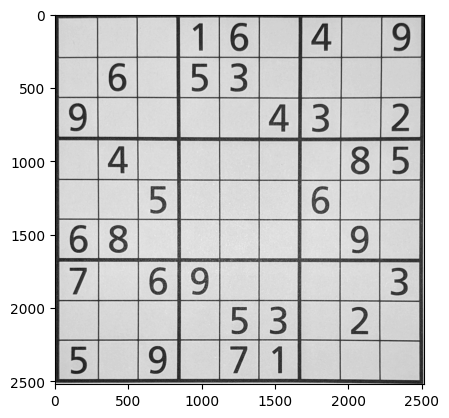

In [672]:
plt.imshow(board_image, cmap='gray')

In [673]:
board_array

array([[0, 0, 0, 1, 6, 0, 4, 0, 9],
       [0, 6, 0, 5, 3, 0, 0, 0, 0],
       [9, 0, 0, 0, 0, 4, 3, 0, 2],
       [0, 4, 0, 0, 0, 0, 0, 8, 5],
       [0, 0, 5, 0, 0, 0, 6, 0, 0],
       [6, 8, 0, 0, 0, 0, 0, 9, 0],
       [7, 0, 6, 9, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 5, 3, 0, 2, 0],
       [5, 0, 9, 0, 7, 1, 0, 0, 0]], dtype=int64)

In [674]:
def check_1d(arr):
    return np.all(np.sort(arr) == np.arange(1,10))

def check_grids(game):
    for row_index_start in np.arange(0,7,3):
        for col_index_start in np.arange(0,7,3):
            check_grid = check_1d(game[row_index_start:row_index_start+3,col_index_start:col_index_start+3].flatten())
            if not check_grid:
                return False
    return True
    
def check_valid_sudoku(game):
    row_check = np.all(np.apply_along_axis(check_1d,axis =1 ,arr= game))
    col_check = np.all(np.apply_along_axis(check_1d,axis =0 ,arr= game))
    grid_check = check_grids(game)
    return np.all([grid_check, row_check, col_check])

def check_all_data_set(data_set):
    invalid_game_list = []
    for i,game in enumerate(data_set.reshape(-1,9,9)):
        if not check_valid_sudoku(game):
            invalid_game_list.append(i)
    if invalid_game_list:
        print(f'Invalid Games at Indices {invalid_game_list}')
        return False
    print('No Invalid Games')
    return True

In [519]:
model_solve = tf.keras.models.load_model(r"C:\Users\MA51801\Documents\Projects\Sudoku_Project\sudoku_solver_models\best_sudoku_solver_test_training_full_set_puzzles_629.h5")

In [675]:
sol = model_solve.predict(board_array.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

1/1 [==============================] - 0s 31ms/step


In [676]:
board_array

array([[0, 0, 0, 1, 6, 0, 4, 0, 9],
       [0, 6, 0, 5, 3, 0, 0, 0, 0],
       [9, 0, 0, 0, 0, 4, 3, 0, 2],
       [0, 4, 0, 0, 0, 0, 0, 8, 5],
       [0, 0, 5, 0, 0, 0, 6, 0, 0],
       [6, 8, 0, 0, 0, 0, 0, 9, 0],
       [7, 0, 6, 9, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 5, 3, 0, 2, 0],
       [5, 0, 9, 0, 7, 1, 0, 0, 0]], dtype=int64)

In [677]:
sol

array([[8, 7, 3, 1, 6, 7, 4, 7, 9],
       [4, 6, 2, 5, 3, 9, 7, 7, 8],
       [9, 5, 1, 8, 8, 4, 3, 6, 2],
       [1, 4, 3, 3, 9, 6, 2, 8, 5],
       [2, 9, 5, 2, 1, 8, 6, 3, 1],
       [6, 8, 3, 3, 1, 5, 2, 9, 4],
       [7, 2, 6, 9, 4, 8, 5, 4, 3],
       [4, 1, 4, 6, 5, 3, 9, 2, 7],
       [5, 3, 9, 2, 7, 1, 8, 4, 6]], dtype=int64)

In [621]:
check_valid_sudoku(sol)

False

In [667]:
preds = model_solve.predict(board_array.reshape(1, 9, 9, 1))[0]
test_solution = board_array.copy()
for row in range(9):
    for col in range(9):
        test_solution[row,col] = preds[row][col].argmax() + 1 if np.max(preds[row][col]) > 0.95 else 0

1/1 [==============================] - 0s 41ms/step


In [668]:
test_solution

array([[4, 6, 3, 7, 9, 8, 0, 2, 1],
       [5, 7, 0, 6, 0, 0, 0, 9, 4],
       [0, 1, 0, 5, 2, 4, 0, 0, 0],
       [0, 5, 7, 0, 8, 0, 1, 0, 9],
       [1, 8, 9, 7, 0, 0, 0, 4, 5],
       [2, 3, 4, 0, 5, 0, 8, 7, 0],
       [0, 0, 0, 9, 7, 6, 4, 1, 0],
       [7, 4, 6, 8, 0, 0, 9, 5, 2],
       [9, 0, 1, 2, 4, 0, 6, 8, 0]], dtype=int64)

In [665]:
new_test = model_solve.predict(test_solution.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

1/1 [==============================] - 0s 38ms/step


In [666]:
new_test

array([[4, 6, 3, 7, 9, 8, 5, 2, 1],
       [5, 7, 2, 6, 3, 1, 5, 9, 4],
       [9, 1, 9, 5, 2, 4, 7, 6, 6],
       [6, 5, 7, 4, 8, 2, 1, 3, 9],
       [1, 8, 9, 7, 6, 7, 3, 4, 5],
       [2, 3, 4, 3, 5, 9, 1, 7, 6],
       [5, 2, 5, 9, 7, 6, 4, 1, 3],
       [7, 4, 6, 8, 1, 3, 9, 5, 2],
       [9, 9, 1, 2, 4, 5, 6, 8, 7]], dtype=int64)

In [643]:
preds = model_solve.predict(test_solution.reshape(1, 9, 9, 1))[0]
test_solution_2 = board_array.copy()
for row in range(9):
    for col in range(9):
        test_solution_2[row,col] = preds[row][col].argmax() + 1 if np.max(preds[row][col]) > 0.99  else 0

1/1 [==============================] - 0s 43ms/step


In [644]:
test_solution_2

array([[2, 1, 4, 6, 3, 5, 8, 7, 9],
       [8, 5, 9, 7, 4, 1, 2, 6, 3],
       [7, 6, 3, 9, 8, 2, 5, 4, 1],
       [0, 8, 2, 0, 9, 6, 7, 1, 4],
       [0, 4, 1, 2, 0, 7, 6, 9, 8],
       [9, 7, 6, 8, 1, 3, 0, 2, 0],
       [6, 9, 5, 3, 7, 4, 1, 8, 2],
       [1, 0, 8, 5, 6, 0, 4, 0, 7],
       [4, 0, 7, 1, 2, 8, 9, 0, 6]], dtype=int64)

In [647]:
new_new = model_solve.predict(test_solution_2.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

1/1 [==============================] - 0s 35ms/step


In [648]:
new_new

array([[2, 1, 4, 6, 3, 5, 8, 7, 9],
       [8, 5, 9, 7, 4, 1, 2, 6, 3],
       [7, 6, 3, 9, 8, 2, 5, 4, 1],
       [5, 8, 2, 2, 9, 6, 7, 1, 4],
       [3, 4, 1, 2, 5, 7, 6, 9, 8],
       [9, 7, 6, 8, 1, 3, 3, 2, 5],
       [6, 9, 5, 3, 7, 4, 1, 8, 2],
       [1, 2, 8, 5, 6, 9, 4, 3, 7],
       [4, 3, 7, 1, 2, 8, 9, 5, 6]], dtype=int64)